In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Step 1: Define scope for Google Sheets API
scope = ["https://spreadsheets.google.com/feeds",
         "https://www.googleapis.com/auth/drive"]

# Step 2: Authenticate using your JSON key
creds = ServiceAccountCredentials.from_json_keyfile_name(r"C:\Users\Lenovo\Desktop\Inventory_Project\inventory-service-key.json.json", scope)
client = gspread.authorize(creds)

# Step 3: Open your Google Sheet (replace with your sheet name)
sheet = client.open("Inventory_Data").sheet1  

# Step 4: Fetch all data into Pandas DataFrame
data = sheet.get_all_records()
df = pd.DataFrame(data)

# Show first 5 rows
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Expiry_Date,Supplier_Name,Lead_Time (days),Purchase_Cost,Selling_Price,Date,Product,Category,Stock_Level,Units_Sold
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,2.55,17850,United Kingdom,04-10-2011,Daily Needs,14,1.91,3.09,01-12-2010,Cookies,FMCG,338,6
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,3.39,17850,United Kingdom,23-11-2011,Global Traders,9,2.75,4.68,01-12-2010,Chips,FMCG,114,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,2.75,17850,United Kingdom,18-08-2011,Urban Wholesale,7,2.28,3.79,01-12-2010,Cookies,FMCG,445,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,3.39,17850,United Kingdom,21-05-2011,Global Traders,8,2.93,3.93,01-12-2010,Cookies,FMCG,463,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,3.39,17850,United Kingdom,31-01-2011,Global Traders,9,2.27,4.71,01-12-2010,Cookies,FMCG,214,6


In [6]:
# Check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Invoice           541910 non-null  object 
 1   StockCode         541910 non-null  object 
 2   Description       541910 non-null  object 
 3   Quantity          541910 non-null  int64  
 4   InvoiceDate       541910 non-null  object 
 5   Price             541910 non-null  float64
 6   Customer ID       541910 non-null  object 
 7   Country           541910 non-null  object 
 8   Expiry_Date       541910 non-null  object 
 9   Supplier_Name     541910 non-null  object 
 10  Lead_Time (days)  541910 non-null  int64  
 11  Purchase_Cost     541910 non-null  float64
 12  Selling_Price     541910 non-null  float64
 13  Date              541910 non-null  object 
 14  Product           541910 non-null  object 
 15  Category          541910 non-null  object 
 16  Stock_Level       54

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID         0
Country             0
Expiry_Date         0
Supplier_Name       0
Lead_Time (days)    0
Purchase_Cost       0
Selling_Price       0
Date                0
Product             0
Category            0
Stock_Level         0
Units_Sold          0
dtype: int64


In [8]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [9]:
# Convert dates to datetime(Convert data types)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Expiry_Date'] = pd.to_datetime(df['Expiry_Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert categorical columns (Convert data types)
categorical_cols = ['Invoice', 'StockCode', 'Description', 'Customer ID', 'Country', 'Supplier_Name', 'Product', 'Category']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           541910 non-null  category      
 1   StockCode         541910 non-null  category      
 2   Description       541910 non-null  category      
 3   Quantity          541910 non-null  int64         
 4   InvoiceDate       232960 non-null  datetime64[ns]
 5   Price             541910 non-null  float64       
 6   Customer ID       541910 non-null  category      
 7   Country           541910 non-null  category      
 8   Expiry_Date       213157 non-null  datetime64[ns]
 9   Supplier_Name     541910 non-null  category      
 10  Lead_Time (days)  541910 non-null  int64         
 11  Purchase_Cost     541910 non-null  float64       
 12  Selling_Price     541910 non-null  float64       
 13  Date              232960 non-null  datetime64[ns]
 14  Prod

In [11]:
# Check for negative values
numeric_cols = ['Quantity', 'Price', 'Purchase_Cost', 'Selling_Price', 'Stock_Level', 'Units_Sold', 'Lead_Time (days)']
for col in numeric_cols:
    print(col, "min:", df[col].min())




Quantity min: -80995
Price min: -11062.06
Purchase_Cost min: -9716.36
Selling_Price min: -14237.95
Stock_Level min: 10
Units_Sold min: 1
Lead_Time (days) min: 2


In [12]:
import numpy as np
import pandas as pd

# Assume 'df' is your DataFrame from the previous steps

# Create a filtered DataFrame with all the problematic rows
problematic_rows = df[
    (df['Quantity'] <= 0) |
    (df['Price'] <= 0) |
    (df['Purchase_Cost'] <= 0) |
    (df['Selling_Price'] <= 0)
]

# Print the number of problematic rows and show the first few
print("Number of rows with non-positive values:", len(problematic_rows))
print("\nFirst 5 problematic rows:")
print(problematic_rows.head())

# Optional: You can also check for summary statistics of these rows
print("\nSummary of problematic rows' numeric columns:")
print(problematic_rows.describe())

Number of rows with non-positive values: 11809

First 5 problematic rows:
     Invoice StockCode                      Description  Quantity  \
141  C536379         D                         Discount        -1   
154  C536383    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE       -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES       -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES       -24   

            InvoiceDate  Price Customer ID         Country Expiry_Date  \
141 2010-01-12 09:41:00  27.50       14527  United Kingdom  2011-04-03   
154 2010-01-12 09:49:00   4.65       15311  United Kingdom         NaT   
235 2010-01-12 10:24:00   1.65       17548  United Kingdom         NaT   
236 2010-01-12 10:24:00   0.29       17548  United Kingdom         NaT   
237 2010-01-12 10:24:00   0.29       17548  United Kingdom         NaT   

       Supplier_Name  Lead_Time (days)  Purchase_Cost  Selling_Pri

In [13]:
# Filter the DataFrame to keep only rows with positive values
# This will create a new, cleaned DataFrame
df_cleaned = df[
    (df['Quantity'] > 0) &
    (df['Price'] > 0) &
    (df['Purchase_Cost'] > 0) &
    (df['Selling_Price'] > 0)
]

# Optional: You can check the new size of the DataFrame to see how many rows were removed
print("Original DataFrame size:", len(df))
print("Cleaned DataFrame size:", len(df_cleaned))

# For all future analysis, you should use the cleaned DataFrame.
# You can reassign it to 'df' if you want.
df = df_cleaned

Original DataFrame size: 541910
Cleaned DataFrame size: 530101


In [14]:
import pandas as pd
import numpy as np

# Assuming 'df' is cleaned DataFrame from the previous steps,
# with 'InvoiceDate' and 'Expiry_Date' already converted to datetime objects.

# 1. Financial Metrics
# Profit per item
df['Profit'] = df['Selling_Price'] - df['Purchase_Cost']

# Total sales per row (Revenue)
df['Total_Sales'] = df['Selling_Price'] * df['Quantity']

# Total profit per row
df['Total_Profit'] = df['Profit'] * df['Quantity']

# 2. Time-Based Features from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['Hour'] = df['InvoiceDate'].dt.hour

# 3. Time-Based Features from Expiry_Date
# Check for null values in Expiry_Date to avoid errors
if 'Expiry_Date' in df.columns:
    df['Days_to_Expiry'] = (df['Expiry_Date'] - df['InvoiceDate']).dt.days
    # Fill NaN values with a meaningful number if desired, e.g., a large number or 0
    df['Days_to_Expiry'] = df['Days_to_Expiry'].fillna(np.nan)

# Display the information of the updated DataFrame
print("DataFrame Info after adding new features:")
df.info()

DataFrame Info after adding new features:
<class 'pandas.core.frame.DataFrame'>
Index: 530101 entries, 0 to 541909
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           530101 non-null  category      
 1   StockCode         530101 non-null  category      
 2   Description       530101 non-null  category      
 3   Quantity          530101 non-null  int64         
 4   InvoiceDate       227704 non-null  datetime64[ns]
 5   Price             530101 non-null  float64       
 6   Customer ID       530101 non-null  category      
 7   Country           530101 non-null  category      
 8   Expiry_Date       208495 non-null  datetime64[ns]
 9   Supplier_Name     530101 non-null  category      
 10  Lead_Time (days)  530101 non-null  int64         
 11  Purchase_Cost     530101 non-null  float64       
 12  Selling_Price     530101 non-null  float64       
 13  Date              2277

In [15]:
#Check for no leading/trailing spaces, consistent capitalization
text_cols = ['Description', 'Country', 'Supplier_Name', 'Product', 'Category']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()


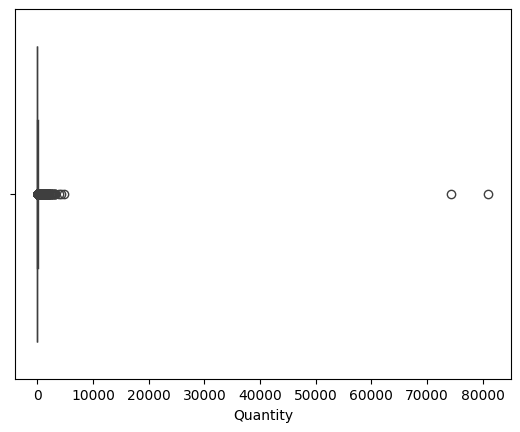

In [17]:
#Checking for outliers
import seaborn as sns
sns.boxplot(x=df['Quantity'])
plt.show()
#The chart shows that most items were sold in small quantities, but there were a few sales for a huge number of items that stand out from the rest.